[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 9 - Statistical Models](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-9.ipynb)

In [19]:
# This chapter uses packages that takes a few minutes to download on Google Colab. 
# Run this first so it's ready by the time you need it
install.packages("ggformula")
library(ggformula)

studentdata <- read.csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/studentdata.csv")

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpWoXRyX/downloaded_packages


# Chapter 10 - Quantifying Model Error

So far we have developed the idea that a statistical model is an attempt to turn a conceptual model into a deterministic one. If we have some idea of the data generation process for a variable of interest, we are trying to make an equation that can capture that process and make accurate predictions about new data.

However, likely we don't know a whole lot about the true data generation process - our equation will be a simplistic approximation of it. And we don't know the full population of our outcome variable, so we have to fit a model to a sample of data and estimate the population parameters.

Sometimes after this process we have a pretty good model - the values our model predicts closely match the real values in the data sample. But sometimes our model is poor, and our predicted values are way off. 

Using the DATA = MODEL + ERROR framework, we have defined error as the residual between a model prediction and a real data value. In the case of a null model for a quantitative outcome variable, the model is the mean of the variable and the error/residual is the deviation of each score above or below the mean.

We represent the simple model like this using the notation of the General Linear Model:

$$ Y_i = b_0 + e_i $$

This equation represents each score in our data (Y<sub>i</sub>) as the sum of two components: the mean of the distribution (b<sub>0</sub>), and the deviation of that score above or below the mean (e<sub>i</sub>). In other words, DATA = MODEL + ERROR.

In this chapter, we will dig deeper into the ERROR part of our DATA = MODEL + ERROR framework. In particular, we will develop methods for quantifying the total amount of error around a model. This helps us identify when we've built a good model of the data generation process. It also helps us compare different versions of models, to see which is better at explaining a sample of data. 

## 10.1 Error distributions

Let's again consider the situation where we are modeling the length of people's thumbs in the dataset ```studentdata``` using the mean of that variable. First, generate a null model using the ```lm()``` function, and then make a new variable to hold the residuals:

In [1]:
thumb_model <-  #use lm() here with the variable "Thumb" in dataset "studentdata"
studentdata$Thumb_residuals <-  #use resid() or thumb_model$residuals here 
head(studentdata)

ERROR: Error in head(studentdata): object 'studentdata' not found


The residuals of a model are the differences between each person's real thumb length, and what the model predicts for them: 

$$Y_i - \hat{Y}_i$$

We now have the residuals for each person stored in the variable ```Thumb_residuals```. Notice that everyone has a different residual - for some people the model makes a pretty close guess, but for other people the guess is way off. All of the residuals together is called the **error distribution** of the model. 

Much like it is useful to plot a histogram of a variable to begin to understand it, we can also plot a histogram of the error distribution. Describing the center, spread, and shape of the error distribution of a statistical model helps us evaluate how good the model is. 

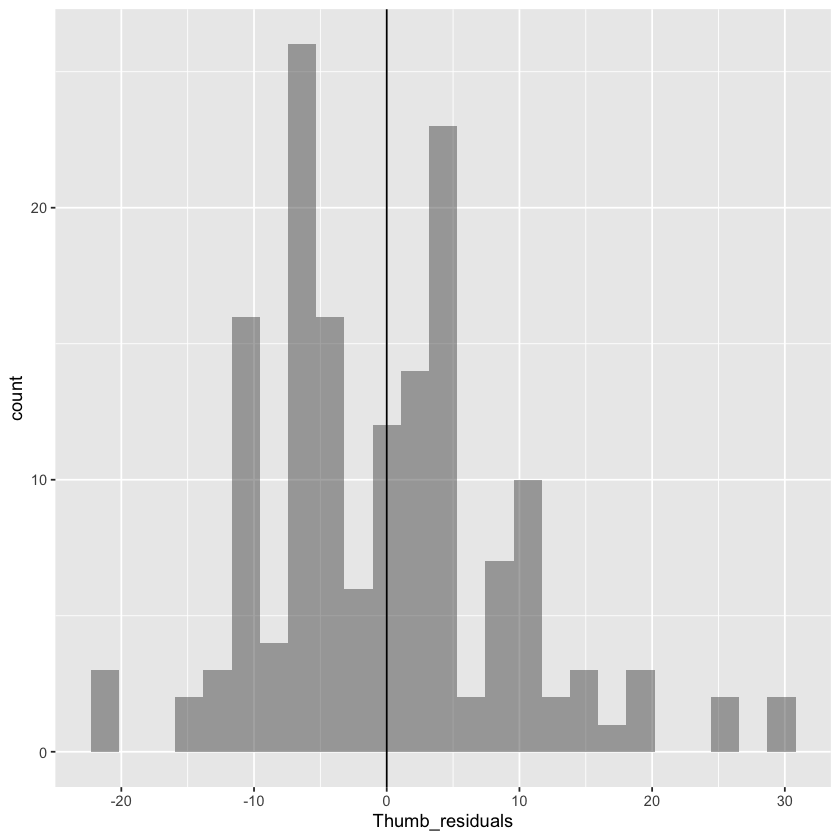

In [26]:
gf_histogram( ~ Thumb_residuals, data = studentdata) %>% 
  gf_vline(., xintercept = mean(studentdata$Thumb_residuals))

## 10.2 Central tendency of the error distribution

The first thing to note about an error distribution is where it is centered. When we base a statistical model on the mean of an outcome variable, like ```lm()``` always does, the mean of the residuals is always centered on zero.

This highlights why the mean is a great starting place for building a model. It turns out that no number other than the mean will perfectly balance the deviations above the mean with those below the mean. The mean is the number that balances the amount of deviation above and below it, yielding the same amount of error above it as below it. This means that, in the absence of other information about the outcome variable being studied, the mean of our sample is the best single estimate we have of what data from the population looks like. It is equally likely to be too high of a guess as it is to be too low of one for any new data point, making it an **unbiased** estimator of the parameter.

Because it is our best guess of what the population parameter is, it is the best predictor we have of the value of a subsequent observation. While it will almost certainly be wrong, the mean will do a better job than any other individual number.

If we were to pick a different number than the mean to use as the model, our residuals would no longer center on zero and on average we would make worse predictions. Check it out below:

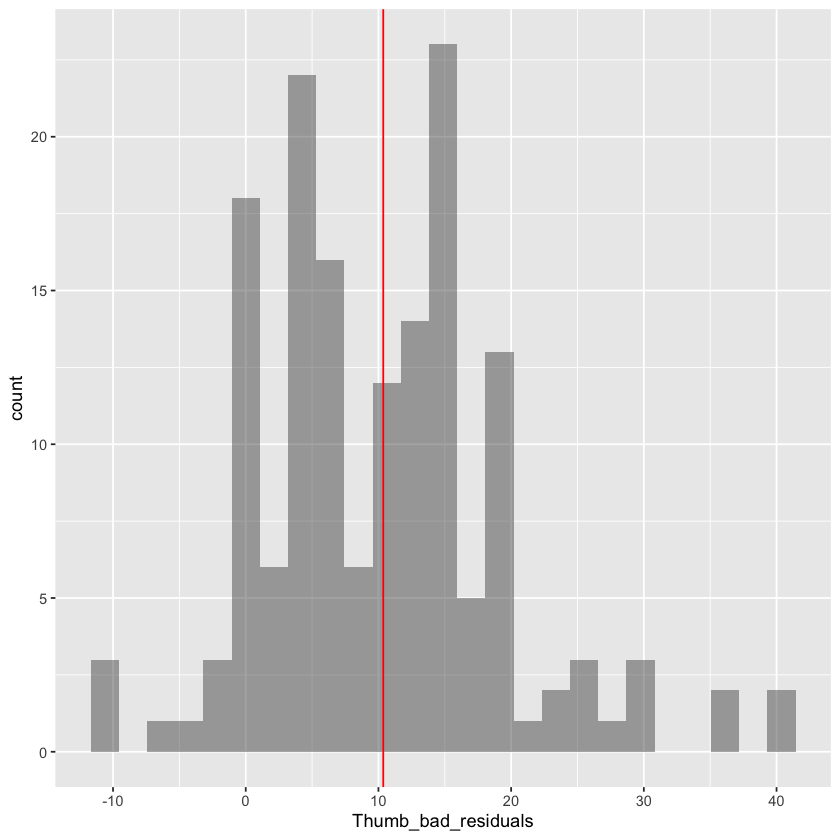

In [21]:
not_the_mean <- 50

studentdata$Thumb_bad_residuals <-  studentdata$Thumb - not_the_mean
gf_histogram( ~ Thumb_bad_residuals, data = studentdata) %>% 
  gf_vline(., xintercept = mean(studentdata$Thumb_bad_residuals), color = "red")

This alternative error distribution has a red line to indicate the mean of ```Thumb_bad_residuals```. Since a residual means deviation between a real value and a prediction, we can see that using this bad model will result in fewer predictions that are too large (negative residuals). This is because we're now always guessing 50 instead of 60. But this also means there are more predictions that are too small, and in general our predictions are off by a greater amount. More often than not, the bad model's guess of thumb lengths will be too low.  

## 10.3 Spread of the error distribution

While the mean is the best single number to use as a model for a variable, most of the time the null model's predictions will be wrong. However, we have noted before that the null model of a quantitative outcome variable is *less wrong* when the spread of the outcome variable's distribution is smaller than when it is larger. When the spread of a variable is smaller, the magnitude of the average residual will be smaller. Thus the spread of the residuals from the model are smaller. Quantifying the total error around a model involves describing this spread, and will help us to know how good our models are.

To make this concrete, look again at the distribution of error from using the mean as a model: 

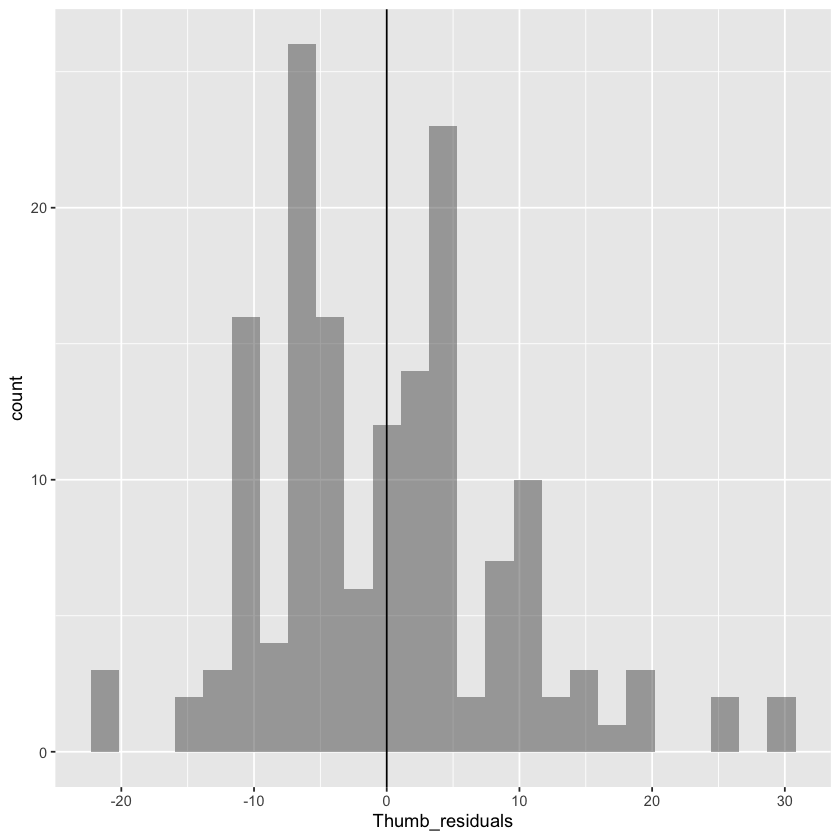

In [22]:
gf_histogram( ~ Thumb_residuals, data = studentdata) %>% 
  gf_vline(., xintercept = mean(studentdata$Thumb_residuals))

A worse model means predictions are farther away from the true data points - bigger magnitude of residuals. So if we want to quantify total error, would we just add up all the residuals? If worse models have more error, the sum of all the errors should represent the “total” error, right?

Let’s do that, using one of the first R functions you learned, ```sum()```. The following code will add up all the residuals calculated by  ```thumb_model```.

In [23]:
sum(studentdata$Thumb_residuals)

[1] 6.217249e-15

The sum of all error in this model is actually 0 (or a number so tiny it's practically zero and is just a rounding error in the computer).

Although we might at first think that the sum of the residuals would be a good indicator of total error, we've discovered a fatal flaw in that approach: the sum of the residuals around the mean is equal to 0! This is because some residuals are negative and some are positive. If the sum of residuals were our measure of total error, all data sets would be equally well modeled by the mean, because the residuals around the mean would always sum to 0. A data set widely spread out around the mean, and one tightly clustered around the mean, would have the same amount of error around this simple model. Clearly we need a different approach.

We can return back to the measures of spread in a distribution that we learned in chapter 5 and apply them to describing total error in a statistical model. Because several of those measures involve talking about spread as deviations away from the middle of a distribution, we can also use them to talk about deviations in a model based on the mean (i.e., spread in an error distribution). 

### Sum of squares
First we'll use a type of spread measure we didn't directly work with yet - **sum of squares**. As we talked about in chapter 5, one way to get around the issue of positive and negative deviations adding up to zero is to square all those numbers first before adding them together. That's all sum of squares is: the sum of all the squared residuals after fitting a model to data. Mathematically, this is written as:

$$ SS = \sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$

Where Y-hat<sub>i</sub> is the prediction our model makes for the value of Y<sub>i</sub>. In the case of an empty model, that's just the mean of variable Y, or Y-bar. Since we already have the column ```Thumb_residuals``` in ```studentdata```, we can easily use vector math to square all the values. Adding those together will create the overall sum of squares for our model. 

In [27]:
sum(studentdata$Thumb_residuals^2)

[1] 12970.48

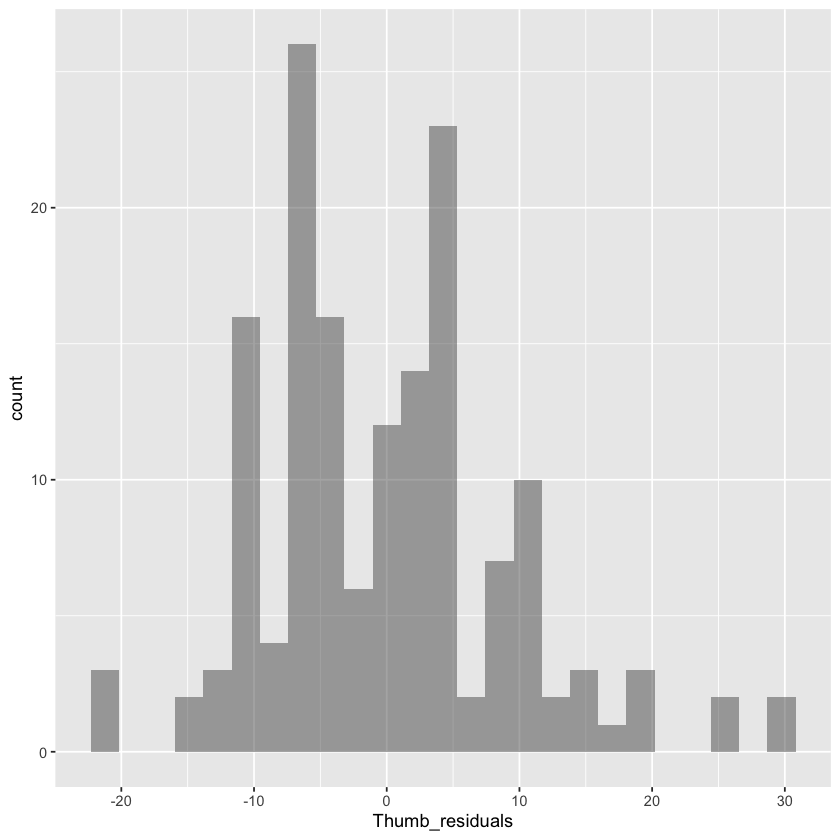

In [28]:
gf_histogram(~Thumb_residuals, data=studentdata)

From this you can see the sum of squares (or SS for short) is about 12970.485, not 0 this time. SS helps us distinguish better-fitting models from worse ones because it is a measure of total error that is minimized when residuals are closer to 0. Since our goal in statistical modeling is to reduce error, this is a good thing. 

<div class="alert alert-block alert-info">
<b>Note</b>: It is worth pointing out that the usefulness of SS is only there if our model is the mean. If we were to choose another number, such as the median, as our model of a distribution, we would need to choose a different measure of error. But our focus in this course is primarily on the mean.
</div>

R also has a handy way of finding the sum of squares in a model automatically generated with ```lm()```. Once we have a model object, we can use a function called ```supernova()``` from the ```supernova``` package to create an **ANOVA table** that allows us to look at the error from this model. ANOVA stands for ANalysis Of VAriance, since we are ultimately analyzing the variance of a dependent variable. With a null model, ```supernova()``` helps us figure out how much error there is in the model, measured in sum of squares.

In [29]:
install.packages("supernova")
library(supernova)

supernova(thumb_model)

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpWoXRyX/downloaded_packages



Attaching package: ‘supernova’


The following object is masked from ‘package:scales’:

    number




 Analysis of Variance Table (Type III SS)
 Model: Thumb ~ NULL

                                SS  df     MS   F PRE   p
 ----- --------------- | --------- --- ------ --- --- ---
 Model (error reduced) |       --- ---    --- --- --- ---
 Error (from model)    |       --- ---    --- --- --- ---
 ----- --------------- | --------- --- ------ --- --- ---
 Total (empty model)   | 12970.485 156 83.144            

There are a bunch of other things in this output that we will talk about in later chapters. For now, focus your attention on the row labeled “Total (empty model)” and the column labeled “SS”. This stands for the sum of squares in the empty model (e.g., sum of squared deviations from the dependent variable mean). We see the same value (12970.485) that we previously calculated with the longer sequence of R commands in which we saved the residuals, squared them, and then summed the squared residuals.

### Mean squared error

Sum of squares is a good measure of *total* variation if we are using the mean as a model. But, it does have one important disadvantage. To see it, compare these two distributions:

<img src="images/ch10-ss.png" width="600">

The one on top is clearly less spread out than the distribution on the bottom, so we would expect that if we used the mean to model that distribution, there'd be less error. However, because there are more data points in that distribution, there are just more error values to add up. The sum of squares becomes larger than that for the more spread out distribution. 

This problem is solved by using **mean squared error** instead. For a null model this is represented by the equation:

$$ MSE = \frac{1}{N-1}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2 $$

The equation above takes the total error (the sum of squares we just computed - can you find that quantity in the equation above?) but then divides by the sample size minus 1 to end up with a measure of *average* error around the mean — the average of the squared deviations. Does this equation seem familiar? Let's copy and paste the equation for variance from chapter 5 and see if you notice any similarities:

$$ s^2 = \frac{1}{N-1}\sum_{i=1}^{N}(Y_i-\bar{Y})^2 $$

Almost exactly the same! The only difference is that variance calculates the mean square deviation of data points from the mean of a distribution (Y - Y-bar), and MSE calculates the mean square deviation between data points and what a statistical model predicts them to be (Y - Y-hat). In fact, in the case where our model is just the mean of variable Y, the MSE and variance of data on Y is exactly the same (since an empty model predicts every data point will equal the mean). However, when we get to more complex models, MSE will differ from variance on the outcome variable. Try to remember it instead as variance of the *error distribution*.   

Because it is an average, MSE is not impacted by sample size, and thus, can be used to compare the amount of error across two samples of different sizes.

<div class="alert alert-block alert-info">
<b>Note</b>: Note that we're not actually dividing by the total sample size, but N - 1. As we mentioned in chapter 5, there are some complex reasons for this that we'll get to later in the course. 
</div>

And how do we calculate MSE in R? You know this one already! We can use ```var()``` on the residuals variable.

In [30]:
var(studentdata$Thumb_residuals)

#same as dividing the sum of squares by N-1
sum(studentdata$Thumb_residuals^2) / (length(studentdata$Thumb) - 1)

[1] 83.14413

[1] 83.14413

You can also find MSE with ```supernova()``` whether or not your model is the mean. Use it now to recreate an ANOVA table for ```thumb_model```:

In [ ]:
supernova(#YOUR CODE HERE)

If your code worked okay, you should see a table with values on the "Total (empty model)" line corresponding to "SS", "df", and "MS". We already know what "SS" is. Now, we can guess that "MS" stands for "mean squared". And as expected, since our model is the mean, the number at that spot in the table matches what we calculated with ```var()```. The number under ```df```, 156, is the "N-1" component of the MSE equation. With this, we can verify that SS/df = MS. 

In [32]:
12970.4846566879/156

#same as the variance in the residuals
var(studentdata$Thumb_residuals)

[1] 83.14413

[1] 83.14413

### Root mean squared error 
The **root mean squared error** (abbreviated as RMSE) is simply the square root of the MSE. This is related in the same way that standard deviation is related to variance. We generally prefer thinking about model error in terms of root mean squared error because it yields a number that makes sense using the original scale of measurement. So, for example, if you were modeling weight in pounds, MSE would express the error in squared pounds (not something we are used to thinking about), whereas RMSE would express the error in pounds. RMSE is how big the residual will be, on average, for any particular data point. This is written as:

$$RMSE = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2}$$

Again, in the special case of the null model where we predict every data point to be equal to the mean, RMSE is just the standard deviation of the variable we are making predictions about. In the general case, it is the standard deviation of the residuals.

See if you can find both the MSE component, and the sum of squares component in that equation. We take several mathematical steps to compute this, but if you can find the prior step in the equation, it's not that hard to see how each measure of error relates to each other.

Of course to calculate standard deviation in R, we can use ```sd()``` on ```Thumb_residuals```:

In [33]:
sd(studentdata$Thumb_residuals)

#same as taking the square root of variance
sqrt(var(studentdata$Thumb_residuals))

#same as dividing the sum of squares by N-1 and then taking the square root
sqrt(sum(studentdata$Thumb_residuals^2) / (length(studentdata$Thumb) - 1))

[1] 9.11834

[1] 9.11834

[1] 9.11834

There isn't a spot for RMSE in the ANOVA table generated by ```supernova()```, but it's easy enough to calculate if we remember how it relates to mean squared error ("MS" in the ANOVA table print out).  

We have discussed three ways of quantifying error around our model. All start with residuals, but they aggregate those residuals in different ways to summarize total error.

All of them assume that the mean is the best single number for representing a variable. If you wanted to use a different single number as a model, like the median or mode, we'd have to use different measures of error (e.g., mean absolute error for median, instead of mean squared error). To keep things simple in this class (well, simpl***er***), from here on out we're going to stick to using the mean as a basic statistical model and its associated measures of error sum of squares, MSE, and RMSE. The majority of data analysis projects also rely on the mean. Don't forget about median and mode! We just won't build models with them in this course. 

## 10.4 Shape of the error distribution

The final thing to notice about the error distribution is how it is shaped. Check out the shape below:

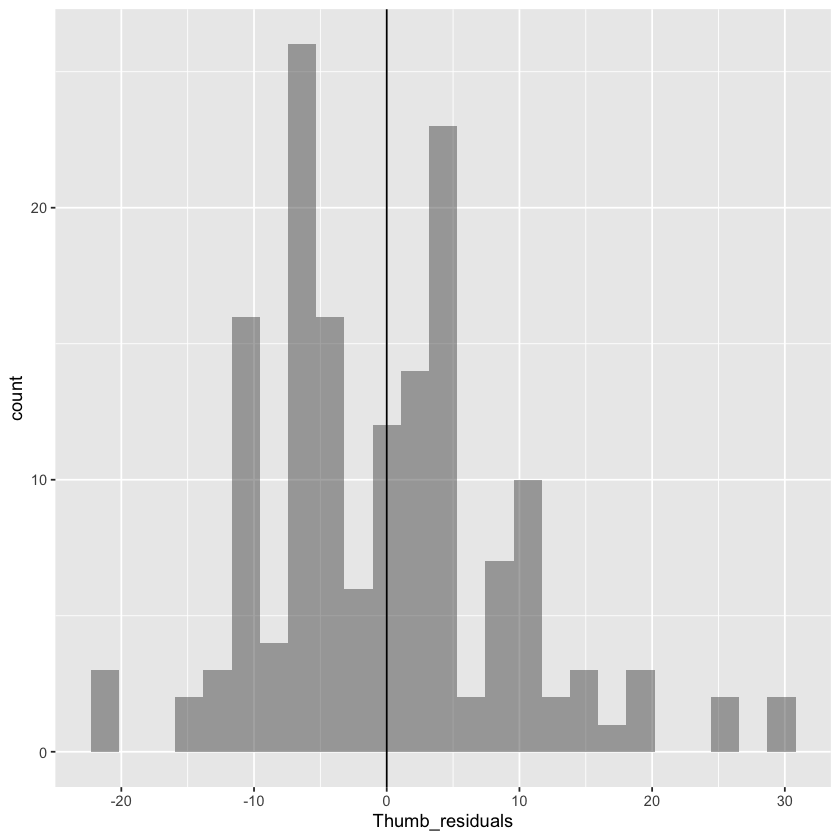

In [34]:
gf_histogram( ~ Thumb_residuals, data = studentdata) %>% 
  gf_vline(., xintercept = mean(studentdata$Thumb_residuals))

How would you describe it in terms of modality and skew? Does it look roughly normal, or strongly distorted in any way? 

Again, when talking about shapes of distributions, we always keep in mind the qualifier "roughly." Even though this distribution is spikey, it roughly resembles a normal distribution. We're not going to do anything with this information just yet (hang on until chapter 22). But in general, you can remember for now that the General Linear Model, the approach to building statistical models and making predictions about data that we are using in this class, works better when residuals are normally distributed. If they're strongly not normal, that is cause for concern over how good your model is and what you should do next. 

## 10.5 Estimates vs. parameters of error

Recall from last chapter our discussion of *estimates* (summaries computed from data samples) and *parameters* (summaries of the underlying population we are trying to guess at). We used Latin vs. Greek letters to separate our estimate of the mean, *M*, from the unknown population mean parameter, *&mu;*. 

We've also now estimated error in a sample (data variance *s<sup>2</sup>*, standard deviation *s*, and model error *e*). It follows then, that there's a true error out there that characterizes how all values in a population vary from *&mu;*. We don't know this parameter, but we try to estimate it. The Greek letters for the error parameters are ***&epsilon;*** for general error (pronounced "epsilon"), ***&sigma;<sup>2</sup>*** for variance (pronounced "sigma squared"), and just ***&sigma;*** for standard deviation ("sigma"). Here is a table of the estimates and parameters we've learned so far, to help keep them straight:

| Concept            | Sample Estimate               | Population Parameter                    | 
| :----------------: | :---------------------------: | :-------------------------------------: |
| Mean               | *Y¯* ("Y-bar")                | *&mu;* ("mu")                           |
| Model coefficient  | *b<sub>0</sub>* ("b sub 0")   | *&beta;<sub>0</sub>* ("beta sub 0")     |
| Model error        | *e*  ("e")                    | *&epsilon;* ("epsilon")                 |
| Variance           | *s<sup>2</sup>* ("s squared") | *&sigma;<sup>2</sup>* ("sigma squared") |
| Standard deviation | *s* ("s")                     | *&sigma;* ("sigma")                     |

## 10.6 Sources of error

This is a good time to think again about where data come from. Why is there variation in a sample of data, and why do our models make inaccurate predictions? We have already talked about the data generation process — the process that generates values in the population. The data generation process likely includes a lot of different components that, working together, produce variation in an outcome variable. With our statistical models, we are trying to approximately describe that process.

If our model is good, using it to make predictions will result in better guesses than if we guessed randomly. This means that our model *explains* some of the variation in the outcome variable, as we had one variable explaining variation in another in chapter 6. 

But a model, being a simplification of the data generation process, doesn't explain all the variation in the outcome variable. There will be error, or some variation the model can't explain. We're trying to minimize that model error, but we're unlikely to ever make it go away like in a deterministic model. There are three important points we want to make about sources of data variation which will help us identify what variation we can reduce with a model, and what we can't. 

First, variation can be either explained or unexplained.

<img src="images/ch10-var1.png" width="400">

In the word equation we presented before, DATA = MODEL + ERROR, explained variation is the portion of the total variation in DATA we are able to explain with MODEL. Unexplained variation is everything included in the ERROR part of the equation. It’s useful to think of total variation as the sum of explained + unexplained variation.

Second, unexplained variation can be a real characteristic of the system we are studying, or it can be variation that is induced by our data collection procedures.

<img src="images/ch10-var2.png" width="650">

If the variation is real, that means we can probably figure out how to explain it if we measure the right explanatory variables; this variation could be thought of as not explained yet.

Variation induced by data collection comes in three buckets: measurement error (e.g., the small random variation that creeps into our measures); sampling error (i.e., the variation that occurs from sample to sample due to the fact that no individual sample is a perfect representation of the population); and measurement mistakes (e.g., that some students had measured their thumbs in centimeters instead of millimeters).

<img src="images/ch10-var3.png" width="900">

The third and final point we want to make is this: even though unexplained variation could be explained if we knew enough, statisticians tend to model unexplained variation, whether real or induced by data collection, as though it were generated by a random process. That's why we expect the shape of the error distribution to be normal. 

## 10.8 Z-Scores

We have looked at the mean as a model, and we have learned some ways to quantify total error around the mean, as well as some good reasons for doing so. But there is another reason to look at both mean and error together. Sometimes, by putting the two ideas together it can give us a better way of understanding where a particular score falls in a distribution.

A student (let’s call her Zelda) has a thumb length of 64mm. Good for her, but what does this mean? Is that a particularly long thumb? How can we know? By now you may be getting the idea that just knowing the length of one thumb doesn’t tell you very much.

To interpret the meaning of a single score, it helps to know something about the distribution the score came from. Specifically, we need to know something about its shape, center and spread.

Let's consider Zelda's thumb length and the mean of ```Thumb``` in the full ```fingers``` dataset, 60.1. By comparing these two values, we know that Zelda’s thumb is about 3.9mm longer than the average. That helps us get a little closer to understanding what this one data point means. But because we have no idea about the spread of the distribution, we still don’t have a clear answer. Is a 3.9mm distance still pretty close to the mean, or is it far away? It’s hard to tell without knowing what the spread of thumb lengths looks like as well.

Error, and standard deviation in particular, is really useful for this. We know that Zelda’s thumb is about 3.9mm longer than the average thumb. But now we also know that, on average, thumbs are 8.7mm away from the mean, both above and below. Although Zelda’s thumb is above average in length, it is definitely not one of the longest thumbs in the distribution, or even that atypical - it is only 0.45 of a standard deviation away from the mean. Check out the histogram below to see this visualized (blue line is the distribution average, red line is Zelda's thumb length).

<img src="images/ch10-zeldathumb.png" width="600">

Consider another example. Your friend tells you they just hit a new high score of 37,000 on a video game. Is that a big deal? Here are two possible distributions of high scores other people get on this game, with your friend's score marked by the red line:

<img src="images/ch10-videogame.png" width="700">

Clearly your friend would be an outstanding player if distribution 1 were true. But if distribution 2 were true, they would be just slightly above average.

It's more useful to say something about a particular data point if we can also communicate about the mean and standard deviation of a distribution. In order to make this easier, so that we don't have to report several numbers at once, we can treat standard deviation as a new *unit* on which to measure our data. Let's convert the value of ```Thumb``` to be a data points deviation from the mean, divided by the standard deviation: 

In [ ]:
fingers$Thumb_scaled <- (fingers$Thumb - mean(fingers$Thumb)) / sd(fingers$Thumb)
fingers$Thumb[2] # value of Zelda's thumb length, in original units
fingers$Thumb_scaled[2] # new value of Zelda's thumb length, in new units

This new unit tells us how much of a standard deviation any score is from the mean. This can be positive (above the mean), or negative (below the mean), like this other person's thumb:

In [ ]:
fingers$Thumb[3] 
fingers$Thumb_scaled[3] 

This unit is called the **z-score**. It is a transformation of a variable so that the middle point of a distribution equals 0, and a value of 1 means one standard deviation above the middle (while -1 is one standard deviation below the middle). To calculate it:

$$ Z_i = \frac{(Y_i - \bar{Y})}{s} $$

where *s* is the standard deviation of Y. You can implement this equation in R (watch out for order of operations!), or you can also use the function ```scale()```.

The “z” in “z-score” comes from the fact that the standard normal distribution (a normal distribution with a mean of zero and a standard deviation of 1) used to be called the “Z” distribution. So, what this transformation does is it actually morphs our data into being a sample from a normal distribution. It also forces the newly-transformed scores to exactly match what the residuals would be if we fit a linear model to the transformed scores:

In [ ]:
z_model <- lm(Thumb_scaled ~ NULL, data = fingers)
fingers$z_residuals <-  resid(z_model)
head(fingers[,c("Thumb_scaled", "z_residuals")])

This all means we can use the standard normal distribution to help us understand what specific z-scores tell us about where a data point sits with respect to the rest of the distribution.

<img src="images/ch10-zscores.png" width="650">

68% of all the data, no matter what scale it was in previously, is within 1 standard deviation of the mean (that's how we define what a standard deviation is). Thus, once we convert to a z-score, 68% of z-scores are between -1 and 1. 95% of z-scores are between -2 and 2.  

A score of 37,000 on a game doesn't mean much to someone who doesn't play that game. But this way it's easy to understand a z-score of 0.2 (a little above average, not too strange) or 3 (way above average, very unusual). 

This leads us to the second value of the z-score - we can compare scores from different distributions. Whether you're measuring thumb length, game score, etc., you can always tell what a more typical vs. more exceptional value is based on its z-score. As we talk about statistical models more, you will see why the z-score is so useful. 

## Chapter summary

After reading this chapter, you should be able to:

- Create a distribution of model errors
- Explain what value this distribution will be centered on
- Define and compare sum of squares, mean squared error, and root mean squared error
- Calculate SS, MSE, and RMSE in a dataset
- Explain the difference between estimates and parameters of error
- Describe different sources of error in a model
- Calculate the z-score of a variable

[Next: Chapter 11 - Adding an Explanatory Variable](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-11.ipynb)